In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import sklearn
import seaborn as sns

In [3]:
walmart_data = pd.read_csv('Walmart.csv')
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Convert date to datetime format

In [4]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])


/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [5]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


# checking for missing values

In [6]:
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Spliting date column into day,month and year

In [7]:
walmart_data['Day'] = pd.DatetimeIndex(walmart_data['Date']).day
walmart_data['Month'] = pd.DatetimeIndex(walmart_data['Date']).month
walmart_data['Year'] = pd.DatetimeIndex(walmart_data['Date']).year

walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


# Analysis

1) Which Store has maximum sales?

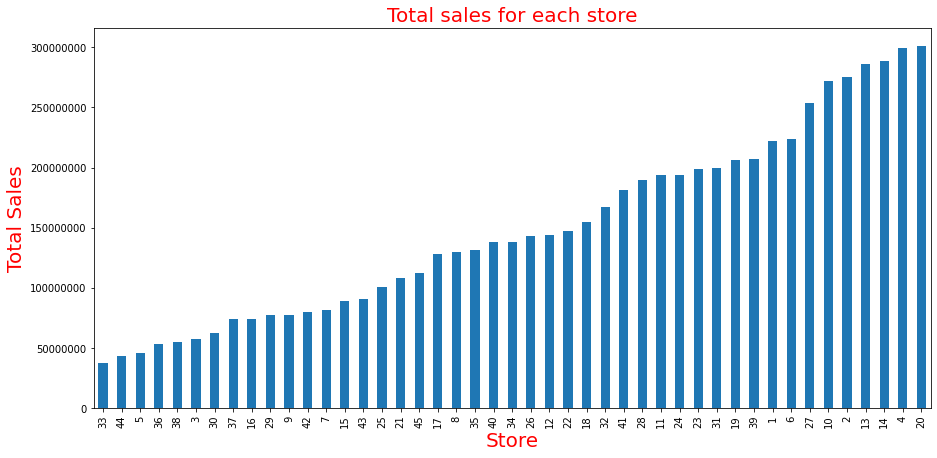

In [11]:
total_sales = walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values()
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title('Total sales for each store',fontsize=20,color='red')
plt.xlabel('Store',fontsize=20,color='red')
plt.ylabel('Total Sales',fontsize=20,color='red')
total_sales.plot(kind='bar')
plt.show()

 Store 20 has maximum sales.
 Store 33 has minimum sales.

2) which store has maximum standard deviation? i.e. the sales vary a lot.Also,find out the coefficient of mean and std

In [13]:
walmart_data_std = pd.DataFrame(walmart_data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
walmart_data_std.head(1).index[0],walmart_data_std.head(1).Weekly_Sales[walmart_data_std.head(1).index[0]]

(14, 317569.9494755081)

Thus, the store has maximum std is store number 14

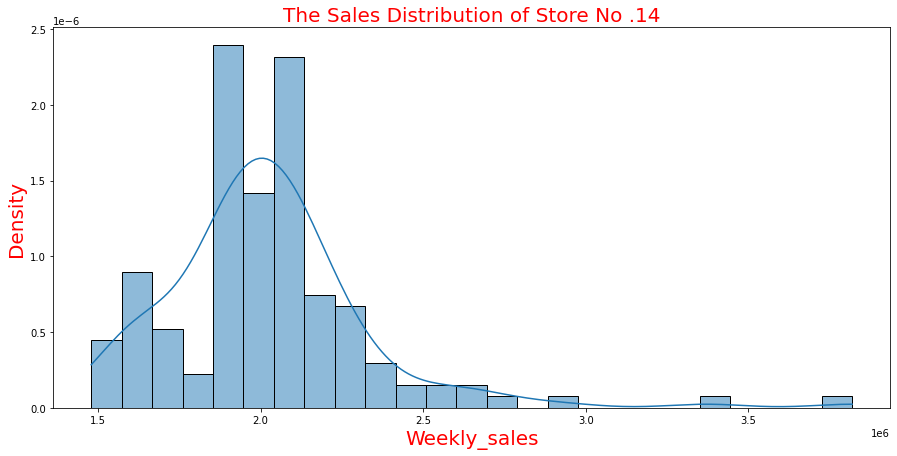

In [18]:
# Extracting the sales data for store Number 14 and plotting its distribution
plt.figure(figsize=(15,7))
sns.histplot(walmart_data[walmart_data['Store']==walmart_data_std.head(1).index[0]]['Weekly_Sales'], kde=True, stat="density")
plt.title('The Sales Distribution of Store No .'+str(walmart_data_std.head(1).index[0]),fontsize=20,color='red')
plt.xlabel('Weekly_sales',fontsize=20,color='red')
plt.ylabel('Density',fontsize=20,color='red')
import warnings
warnings.filterwarnings('ignore')
plt.show()

In [20]:
# calculating the coefficient of mean to standard deviation
coef = pd.DataFrame(walmart_data.groupby('Store')['Weekly_Sales'].std() / walmart_data.groupby('Store')['Weekly_Sales'].mean())
coef = coef.rename(columns={'Weekly_Sales':'Coefficient of mean to std'})
coef_max = coef.sort_values(by='Coefficient of mean to std',ascending=False)
coef_max.head(7)

,Coefficient of mean to std
Store,
35,0.229681
7,0.197305
15,0.193384
29,0.183742
23,0.179721
21,0.170292
45,0.165613


thus, the store which has maximum coefficient of mean to std is store number 35.

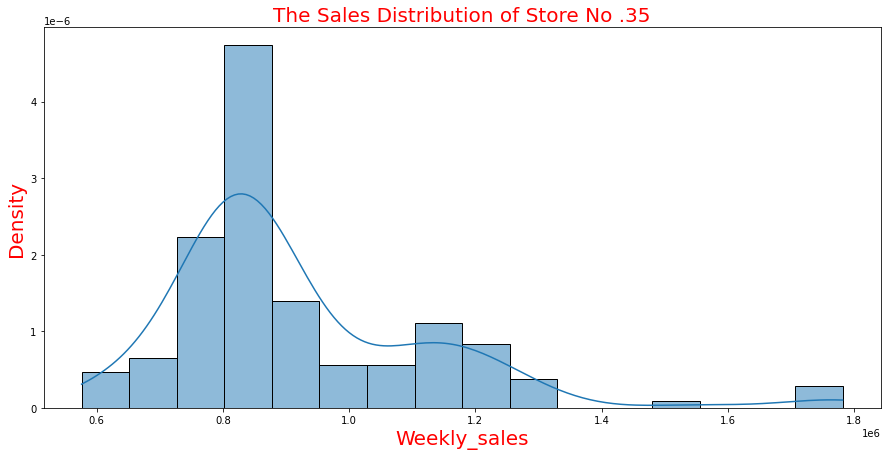

In [21]:
# Distribution of store Number 35 has maximum coefficient of mean to std
plt.figure(figsize=(15,7))
sns.histplot(walmart_data[walmart_data['Store']==coef_max.head(1).index[0]]['Weekly_Sales'], kde=True, stat="density")
plt.title('The Sales Distribution of Store No .'+str(coef_max.head(1).index[0]),fontsize=20,color='red')
plt.xlabel('Weekly_sales',fontsize=20,color='red')
plt.ylabel('Density',fontsize=20,color='red')
import warnings
warnings.filterwarnings('ignore')
plt.show()

3) which store's has good quarterly growth rate in Q3'2012

In [22]:
# sales for second and third quarter in 2012
quarter_2_sales = walmart_data[(walmart_data['Date']>='2012-04-01') & (walmart_data['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales = walmart_data[(walmart_data['Date']>='2012-07-01') & (walmart_data['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

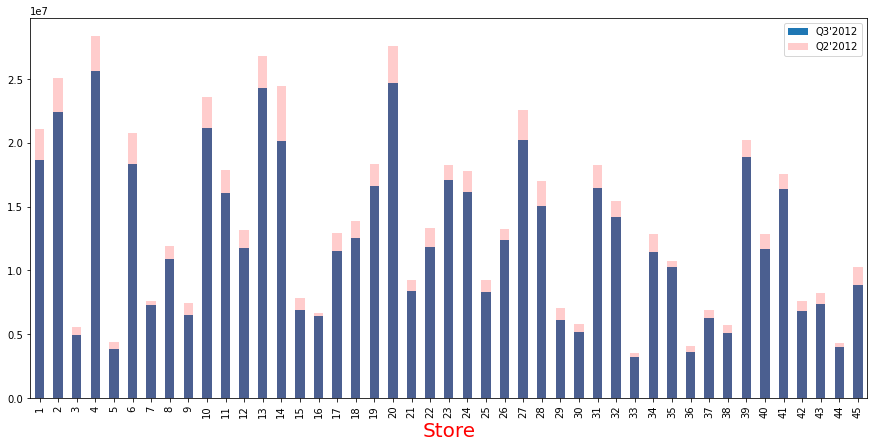

In [24]:
# Plotting the difference between sales for second and third quarterly
plt.figure(figsize=(15,7))
quarter_2_sales.plot(ax=quarter_3_sales.plot(kind='bar'),kind='bar',color='r',alpha=0.2,legend=True)
plt.legend(["Q3'2012","Q2'2012"])
plt.xlabel('Store',fontsize=20,color='red')
plt.show()

Clearly, from the graph the store which has good quarterly sales in Q3'2012 is store no.4.

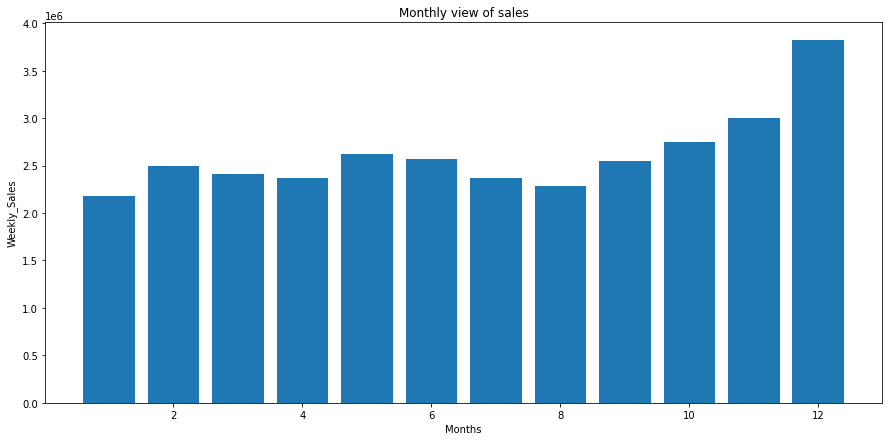

In [26]:
# Overall Monthly Sales 
plt.figure(figsize=(15,7))
plt.bar(walmart_data['Month'],walmart_data['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthly view of sales')
plt.show()

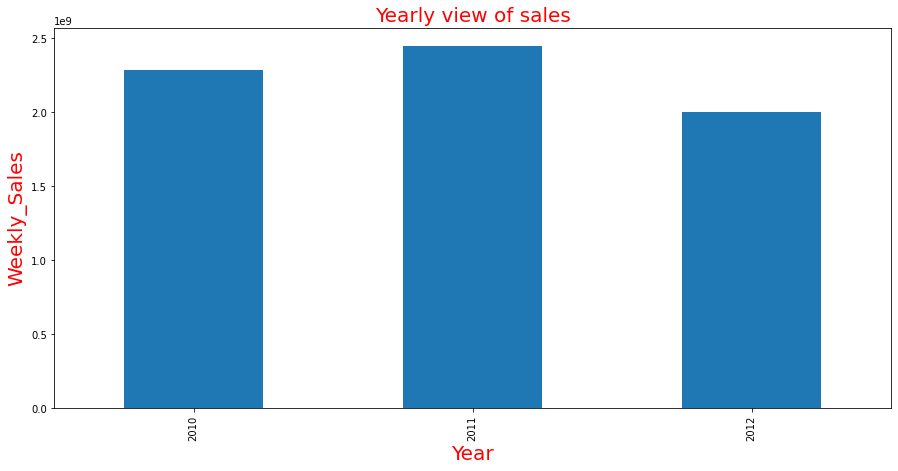

In [34]:
# Overall yearly Sales 
plt.figure(figsize=(15,7))
walmart_data.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar',legend=False)
plt.xlabel('Year',fontsize=20,color='red')
plt.ylabel('Weekly_Sales',fontsize=20,color='red')
plt.title('Yearly view of sales',fontsize=20,color='red')
plt.show()

Here,overall monthly saleas are higher in the month of December while the yearly sales in the year 2011 are highest.